In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [12]:
# Importing Data set
path=r'C:\Users\swati\Employee Termination Analysis'
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','Terminated.csv'), index_col = False, low_memory = False)

In [13]:
df.head()

,Unnamed: 0,employee_id,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_number,gender,termreason_desc,termtype_desc,year_of_record,employment_status,business_unit,job_category,population,_merge,population_flag,age_flag
0,10915,1338,2/16/2009,60,19,Vancouver,Training,"Director, Training",35,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age
1,10916,1341,2/21/2009,60,19,Vancouver,Labor Relations,"Director, Labor Relations",35,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age
2,10917,1344,2/25/2014,65,24,Vancouver,HR Technology,"Director, HR Technology",35,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age
3,10918,1346,3/4/2014,65,24,Vancouver,Employee Records,"Director, Employee Records",35,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age
4,10919,1351,3/9/2009,60,19,Vancouver,Compensation,"Director, Compensation",35,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age


In [14]:
df.shape

(1419, 20)

In [15]:
# Create a new column showing the count for each 'Terminated Count'
df['Terminated Count'] = df.groupby('terminationdate_key')['terminationdate_key'].transform('count')

In [16]:
df.head()

,Unnamed: 0,employee_id,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_number,gender,...,termtype_desc,year_of_record,employment_status,business_unit,job_category,population,_merge,population_flag,age_flag,Terminated Count
0,10915,1338,2/16/2009,60,19,Vancouver,Training,"Director, Training",35,Male,...,Voluntary,2009,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1
1,10916,1341,2/21/2009,60,19,Vancouver,Labor Relations,"Director, Labor Relations",35,Male,...,Voluntary,2009,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1
2,10917,1344,2/25/2014,65,24,Vancouver,HR Technology,"Director, HR Technology",35,Female,...,Voluntary,2014,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1
3,10918,1346,3/4/2014,65,24,Vancouver,Employee Records,"Director, Employee Records",35,Female,...,Voluntary,2014,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1
4,10919,1351,3/9/2009,60,19,Vancouver,Compensation,"Director, Compensation",35,Male,...,Voluntary,2009,TERMINATED,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1


In [17]:
# Create a new dataframe with just the 'Incident Date' and 'Incident Count'
df_1 = df[['terminationdate_key', 'Terminated Count']]

In [18]:
df_1.head()

,terminationdate_key,Terminated Count
0,2/16/2009,1
1,2/21/2009,1
2,2/25/2014,1
3,3/4/2014,1
4,3/9/2009,1


In [19]:
df_1.shape

(1419, 2)

In [20]:
# Check for duplicates
dups = df_1.duplicated()
dups.sum()

390

In [21]:
# Remove duplicates
df_clean = df_1.drop_duplicates()

In [22]:
df_clean.shape

(1029, 2)

In [24]:
# Convert 'Incident Date' to datetime format
df_clean['terminationdate_key'] = pd.to_datetime(df_clean['terminationdate_key'])

In [25]:
df_clean.head()

,terminationdate_key,Terminated Count
0,2009-02-16,1
1,2009-02-21,1
2,2014-02-25,1
3,2014-03-04,1
4,2009-03-09,1


In [27]:
# Create a 'Month/Year' column
df_clean['Month'] = df_clean['terminationdate_key'].dt.month
df_clean['Year'] = df_clean['terminationdate_key'].dt.year

In [28]:
df_clean.head()

,terminationdate_key,Terminated Count,Month,Year
0,2009-02-16,1,2,2009
1,2009-02-21,1,2,2009
2,2014-02-25,1,2,2014
3,2014-03-04,1,3,2014
4,2009-03-09,1,3,2009


In [29]:
# Create a new column showing count for each month/year
df_clean['Termination Count'] = df_clean.groupby(['Month', 'Year'])['Terminated Count'].transform('sum')

In [30]:
df_clean.head()

,terminationdate_key,Terminated Count,Month,Year,Termination Count
0,2009-02-16,1,2,2009,11
1,2009-02-21,1,2,2009,11
2,2014-02-25,1,2,2014,16
3,2014-03-04,1,3,2014,5
4,2009-03-09,1,3,2009,18


In [31]:
# Create a new column with the month/year combined
df_clean['Date'] = pd.to_datetime(df_clean[['Year', 'Month']].assign(DAY = 1))
df_clean.head()

,terminationdate_key,Terminated Count,Month,Year,Termination Count,Date
0,2009-02-16,1,2,2009,11,2009-02-01
1,2009-02-21,1,2,2009,11,2009-02-01
2,2014-02-25,1,2,2014,16,2014-02-01
3,2014-03-04,1,3,2014,5,2014-03-01
4,2009-03-09,1,3,2009,18,2009-03-01


In [32]:
# Remove columns
df_clean = df_clean.drop(columns = ['terminationdate_key', 'Terminated Count', 'Month', 'Year'])
df_clean.head()

,Termination Count,Date
0,11,2009-02-01
1,11,2009-02-01
2,16,2014-02-01
3,5,2014-03-01
4,18,2009-03-01


In [33]:
# Check for duplicates
dups_1 = df_clean.duplicated()
dups_1.sum()

909

In [34]:
df_clean.shape

(1029, 2)

In [35]:
df_2 = df_clean.drop_duplicates()

In [36]:
df_2.shape

(120, 2)

In [37]:
# Check for missing values
df_2.isnull().sum()

Termination Count    0
Date                 0
dtype: int64

In [43]:
df_2.head(50)

,Termination Count
datetime,
2009-02-01,11
2014-02-01,16
2014-03-01,5
2009-03-01,18
2014-04-01,6
2009-04-01,9
2014-05-01,8
2009-05-01,13
2009-06-01,12


In [45]:
df_sorted = df_2.sort_values(by='datetime', ascending=True)

In [46]:
df_sorted.head(50)

,Termination Count
datetime,
2006-01-01,8
2006-02-01,12
2006-03-01,12
2006-04-01,8
2006-05-01,8
2006-06-01,7
2006-07-01,18
2006-08-01,5
2006-09-01,13


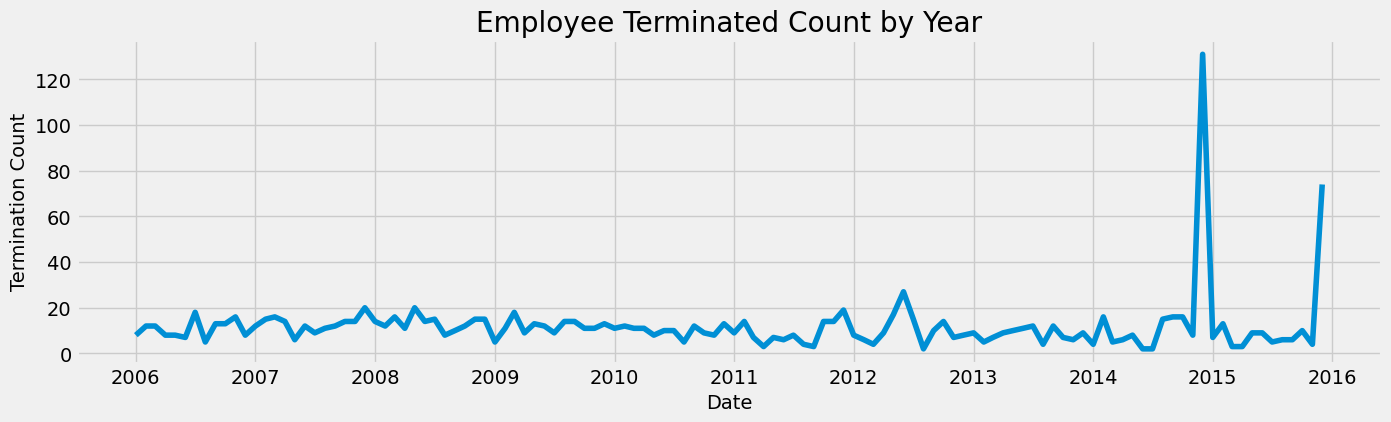

In [48]:
# Plot new dataset
plt.figure(figsize = (15, 4), dpi = 100)
plt.title('Employee Terminated Count by Year')
plt.xlabel('Date')
plt.ylabel('Termination Count')
plt.plot(df_sorted)

In [49]:
# Decompose the time series using additive model by monthly frequency
decomposition = sm.tsa.seasonal_decompose(df_sorted, model = 'additive')

In [50]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

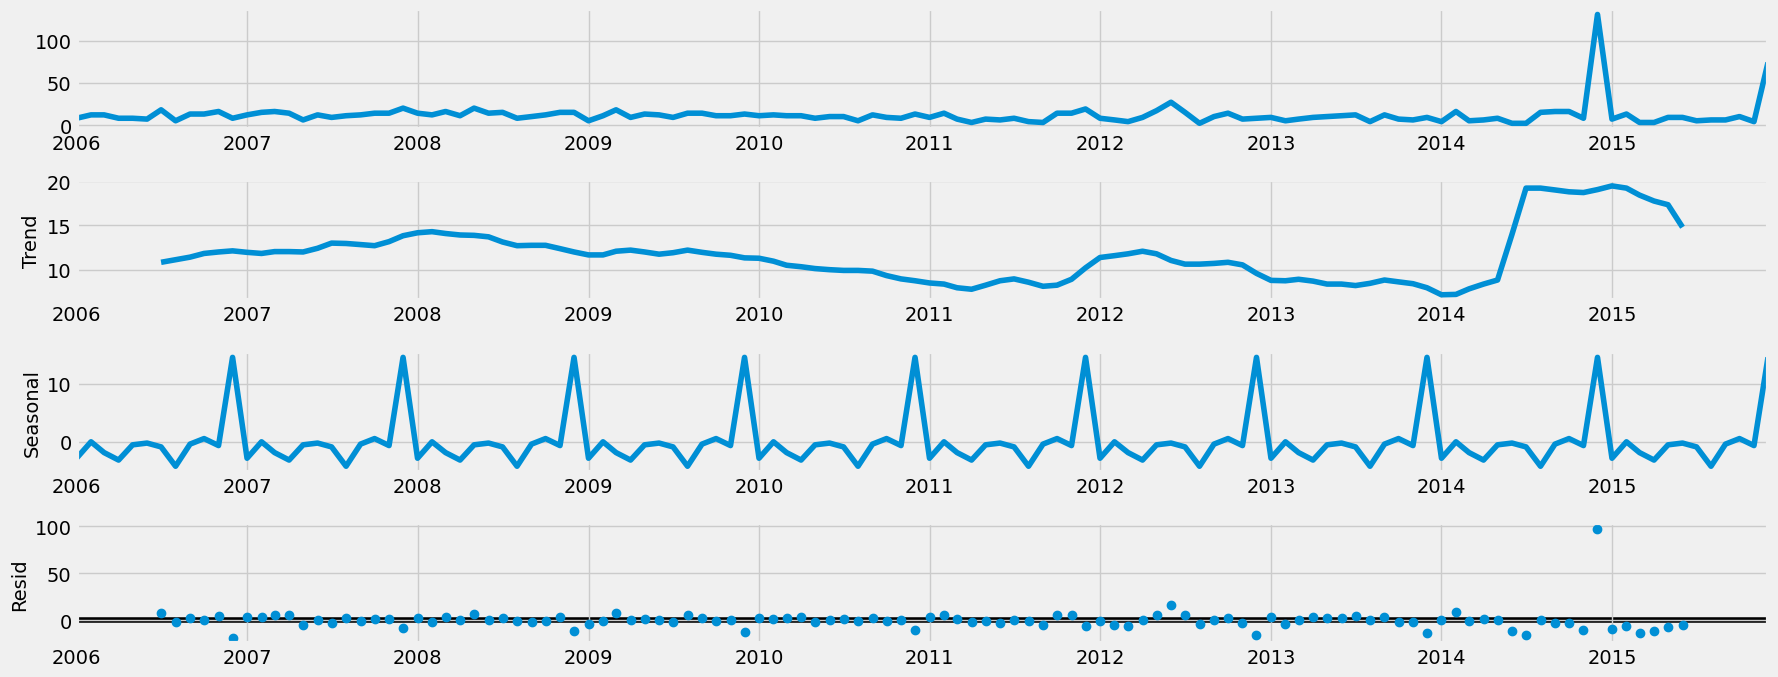

In [51]:
# Plot the separate components

decomposition.plot()
plt.show()

In [54]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why we need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sorted['Termination Count'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.383021
p-value                          0.146586
Number of Lags Used             11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


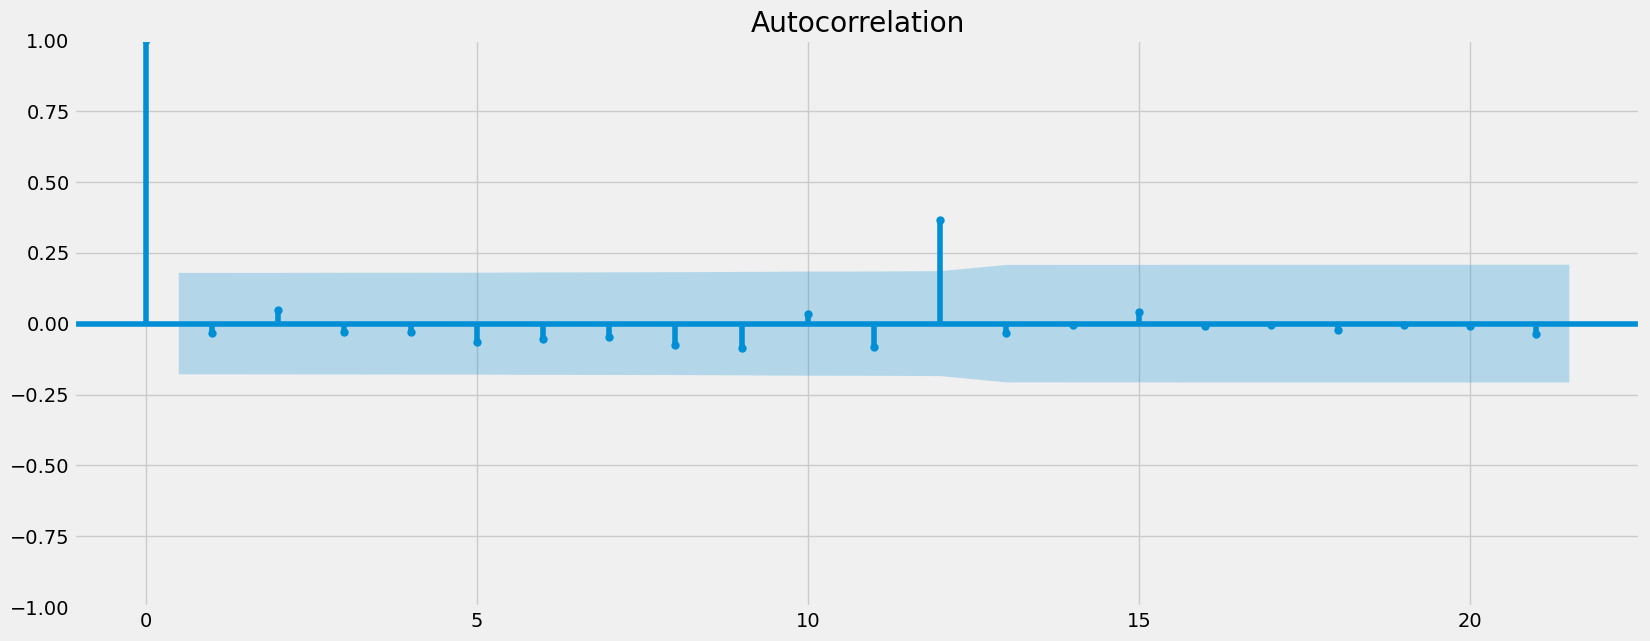

In [55]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sorted)
plt.show()